In [34]:
from bs4 import BeautifulSoup
import glob
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def get_details(soup):
    content_items = soup.find_all('div', class_="re__pr-specs-content-item")
    content = {}
    for item in content_items:
        key = item.find('span', class_='re__pr-specs-content-item-title').text
        value = item.find('span', class_='re__pr-specs-content-item-value').text
        content[key] = value
    return content

In [3]:
html_files = glob.glob('data/*.html')

feature_names = []
list_post_details = []
for html_file in html_files:
    with open(html_file, "r", encoding="utf-8") as file:
        content = file.read()

    soup = BeautifulSoup(content, 'html.parser')
    content = get_details(soup)
    list_post_details.append(content)
    
    for item in content:
        if item not in feature_names:
            feature_names.append(item)



In [4]:
feature_names


['Diện tích',
 'Mức giá',
 'Đường vào',
 'Mặt tiền',
 'Hướng nhà',
 'Hướng ban công',
 'Số phòng ngủ',
 'Số toilet',
 'Pháp lý',
 'Nội thất',
 'Số tầng']

In [28]:
df = pd.DataFrame(columns=feature_names)
new_rows_df = pd.DataFrame(list_post_details)
df = pd.concat([df, new_rows_df], ignore_index=True)

In [29]:
print(df.shape)
df.head()

(28, 11)


,Diện tích,Mức giá,Đường vào,Mặt tiền,Hướng nhà,Hướng ban công,Số phòng ngủ,Số toilet,Pháp lý,Nội thất,Số tầng
0,170 m²,27 tỷ,"11,5 m",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170 m²,26 tỷ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90 m²,18 tỷ,14 m,6 m,Đông - Nam,Đông - Nam,NaN,NaN,NaN,NaN,NaN
3,66 m²,Thỏa thuận,NaN,NaN,NaN,NaN,2 phòng,2 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ,NaN
4,33 m²,"4,85 tỷ",NaN,"3,9 m",NaN,NaN,3 phòng,NaN,NaN,NaN,NaN


In [10]:
non_empty_counts = df.count()
print(non_empty_counts)

Diện tích         28
Mức giá           28
Đường vào          6
Mặt tiền           8
Hướng nhà          8
Hướng ban công     6
Số phòng ngủ      11
Số toilet          9
Pháp lý           18
Nội thất           7
Số tầng            5
dtype: int64


In [62]:
def extract_float(s):
    if not s:
        return None
    if pd.isna(s):
        return None
    match = re.search(r'\d+(\.\d+)?', s)
    if match:
        return float(match.group())
    return None


def extract_integer(s):
    if not s:
        return None
    if pd.isna(s):
        return None
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    return None

def convert_price_to_billion(price_str):
    if not price_str:
        return None
    if pd.isna(price_str):
        return None
    if price_str == 'Thỏa thuận':
        return None
    price_str = price_str.lower()
    pattern = re.findall(r'(\d+(?:,\d+)?)\s*(tỷ|triệu)', price_str)
    total_price_in_billion = 0
    for value, unit in pattern:
        value = float(value.replace(',', '.'))
        if unit == "tỷ":
            total_price_in_billion += value
        elif unit == "triệu":
            total_price_in_billion += value / 1000
    return total_price_in_billion

In [75]:
new_df = df.copy()

new_df['Diện tích'] = new_df['Diện tích'].apply(extract_float)
new_df['Mức giá'] = new_df['Mức giá'].apply(convert_price_to_billion)
new_df['Đường vào'] = new_df['Đường vào'].apply(extract_float)
new_df['Mặt tiền'] = new_df['Mặt tiền'].apply(extract_float)
new_df['Số phòng ngủ'] = new_df['Số phòng ngủ'].apply(extract_integer)
new_df['Số toilet'] = new_df['Số toilet'].apply(extract_integer)
new_df['Số tầng'] = new_df['Số tầng'].apply(extract_integer)


In [71]:
print(new_df.shape)
new_df.head()

(28, 11)


,Diện tích,Mức giá,Đường vào,Mặt tiền,Hướng nhà,Hướng ban công,Số phòng ngủ,Số toilet,Pháp lý,Nội thất,Số tầng
0,170.0,27.00,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170.0,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90.0,18.00,14.0,6.0,Đông - Nam,Đông - Nam,NaN,NaN,NaN,NaN,NaN
3,66.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,NaN
4,33.0,4.85,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [78]:
new_df.dropna(subset=['Mức giá'], inplace=True)
print(new_df.shape)
new_df.head(10)

(21, 11)


,Diện tích,Mức giá,Đường vào,Mặt tiền,Hướng nhà,Hướng ban công,Số phòng ngủ,Số toilet,Pháp lý,Nội thất,Số tầng
0,170.0,27.00,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170.0,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90.0,18.00,14.0,6.0,Đông - Nam,Đông - Nam,NaN,NaN,NaN,NaN,NaN
4,33.0,4.85,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
6,85.0,23.00,NaN,NaN,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,3.0
7,40.0,13.50,5.0,4.0,NaN,NaN,5.0,5.0,Sổ đỏ/ Sổ hồng,NaN,5.0
9,150.0,21.50,NaN,NaN,NaN,NaN,NaN,NaN,Sổ đỏ.,NaN,NaN
10,72.0,2.35,10.0,5.0,Đông - Nam,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN
11,83.0,25.00,NaN,7.0,Nam,Đông - Nam,3.0,3.0,Sổ đỏ/ Sổ hồng,NaN,3.0
12,65.0,2.98,NaN,NaN,Đông - Bắc,Tây - Nam,2.0,2.0,Sổ đỏ/ sổ hồng,NaN,NaN


In [79]:
encode_df = new_df.copy()

encode_df['Hướng nhà'] = encode_df['Hướng nhà'].astype('category').cat.codes
encode_df['Hướng ban công'] = encode_df['Hướng ban công'].astype('category').cat.codes
encode_df['Pháp lý'] = encode_df['Pháp lý'].astype('category').cat.codes
encode_df['Nội thất'] = encode_df['Nội thất'].astype('category').cat.codes


In [85]:
print(encode_df.shape)
encode_df.head(10)

(21, 11)


,Diện tích,Mức giá,Đường vào,Mặt tiền,Hướng nhà,Hướng ban công,Số phòng ngủ,Số toilet,Pháp lý,Nội thất,Số tầng
0,170.0,27.00,11.0,NaN,-1,-1,NaN,NaN,-1,-1,NaN
1,170.0,26.00,NaN,NaN,-1,-1,NaN,NaN,-1,-1,NaN
2,90.0,18.00,14.0,6.0,2,1,NaN,NaN,-1,-1,NaN
4,33.0,4.85,NaN,3.0,-1,-1,3.0,NaN,-1,-1,NaN
6,85.0,23.00,NaN,NaN,-1,-1,NaN,NaN,3,-1,3.0
7,40.0,13.50,5.0,4.0,-1,-1,5.0,5.0,3,-1,5.0
9,150.0,21.50,NaN,NaN,-1,-1,NaN,NaN,2,-1,NaN
10,72.0,2.35,10.0,5.0,2,-1,NaN,NaN,3,-1,NaN
11,83.0,25.00,NaN,7.0,0,1,3.0,3.0,3,-1,3.0
12,65.0,2.98,NaN,NaN,1,0,2.0,2.0,4,-1,NaN


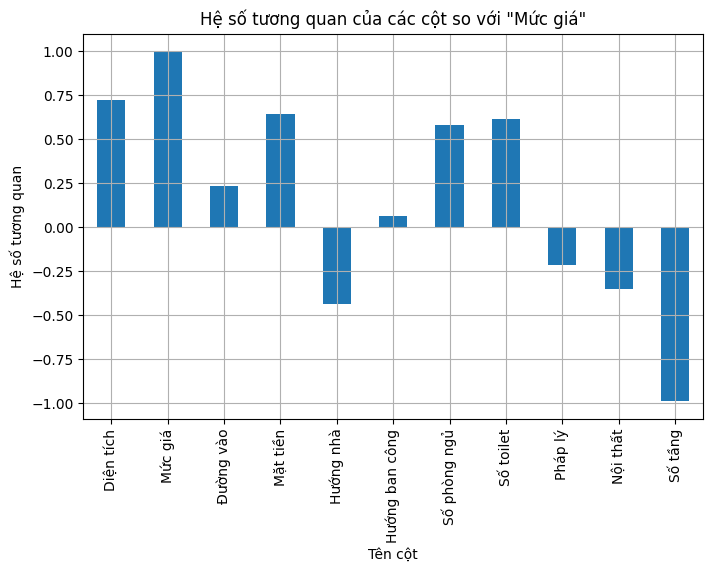

In [81]:
correlations = encode_df.corr()['Mức giá']

plt.figure(figsize=(8, 5))
correlations.plot(kind='bar')

plt.title('Hệ số tương quan của các cột so với "Mức giá"')
plt.ylabel('Hệ số tương quan')
plt.xlabel('Tên cột')
plt.grid(True)
plt.show()

In [ ]:
encode_df = encode_df.drop(columns=['Hướng nhà', 'Hướng ban công', 'Pháp lý', 'Nội thất'])
encode_df = encode_df.dropna()
encode_df.to_csv('cleaned_data.csv', index=False)
